# Advance Classification Solution
### EDSA - Climate Change Belief Analysis 2022 
#### DATAWARE Solutions - Team 12 EDSA

© Explore Data Science Academy

<img src="https://imgs.search.brave.com/m-StEIqAor6PejzhO1QIqVfwYFP4znrfECo0PNzDdcM/rs:fit:1200:788:1/g:ce/aHR0cHM6Ly90YXVi/bWFuY29sbGVnZS51/bWljaC5lZHUvc2l0/ZXMvZGVmYXVsdC9m/aWxlcy9zdHlsZXMv/Zm91cl9jb2x1bW5f/ZmVhdHVyZS9wdWJs/aWMvZmVhdHVyZWRf/aW1hZ2VzL0NsaW1h/dGUtQ2hhbmdlLUZl/YXJzXzAuanBnP2l0/b2s9VTVpc2hrQXI" width=100%/> 

<a id="cont"></a>
## Table of Content

<a href=#one>1. Introduction</a>

    1.1 Overview
    1.2 Problem Statement
    1.3 Model Versioning with COMET
    1.4 Installing NLTK Corpora
    1.5 Additional Python Library Installation
       
<a href=#two>1. Import Packages</a>

<a href=#three>2. Collect Data</a>

<a href=#four>4. Exploratory Data Analysis (EDA)<a>
    
    4.1 Missing Data Check
    4.2 Target Distribution Visualization

<a href=#five>5. Data Processing</a>
    
    5.1 Text Cleaning
    5.2 Futher Data Exploration
    5.3 Tokenization
    5.4 Remove Stopwods
    5.5 Stemmig & Lemming Tokens
    5.6 Text Feature Extraction
    5.7 WordCloud

<a href=#six>6. Feature Engineering</a>

<a href=#seven>7. Modelling</a>
    
    7.1 Set Classifer
    7.2 Build Model Function
    7.3 Execute Classifer

<a href=#eight>8. Model Performance</a>
    
    8.1 Model Test Scores
    8.2 Best Model Resolution
    8.3 Hypertunning Best Model
    8.4 Best Model Confusion Matrix

<a href=#nine>9. Saving & Exporting Model</a>
    
    9.1 Export Test Prediction as CSV
    9.2 Log to Comet

<a href=#ten>10. Conclusion</a>

<a href=#eleven>11. Recommendation</a>

<a href=#ref>Reference Document Links</a>

<a id="one"></a>
## 1. INTRODUCTION
<a href=#cont>Back to Table of Contents</a>

### 1.1 Overview

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

Hence, We will be creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.


### 1.2 Problem Statement

Companies now are constantly in the push for more sustainable business practices, products and services with many increasingly labeling themselves “eco-friendly”, but along with that, like every other business, feasibility is very important as well. 

We are making available a tool to aid marketing, understanding feasibility, maximising productivity, driving profitability by the knowledge of the demand & Supply on her goods & services, being able to classifying Tweets, messages and comments of her market to sentiment classes. With increase in positive climatory sentiments per target region, the more likehood an Eco-friendly gadget will thrive there.

### 1.3 Model Versioning with COMET

To Begin with, We will be using Comet, a great tool for model versioning and experimentation as it records the parameters and conditions from each of your experiements- allowing you to reproduce your results, or go back to a previous version of your experiment.

In [1]:
# Install Comet
# !pip install comet_ml

In [2]:
# Import Comet package
from comet_ml import Experiment

# Setting the API key (saved as environment variable)
"""
Go ahead and get your api_key, project_name & workspace from your
Comet Project Folder.
"""

experiment = Experiment(
    api_key="CL3r4k2Kr1MFTRdavZUxjrBSy",
    project_name="team-12-advanced-classification-sentiment-analysis",
    workspace="jeniffermukami",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/jeniffermukami/team-12-advanced-classification-sentiment-analysis/53bdf10ae2b14a6c99b6a1474dca13bf



###  1.4 Installing NLTK Corpora
Required during text processing, have installed `nltk`. Use example includes, to find all [stopwords](https://www.geeksforgeeks.org/removing-stop-words-nltk-python/) in a given string of text. This is a required list of all possible stopwords in the English language to use for stopword removal lookup. Such a list is refered to as a [corpus](https://en.wikipedia.org/wiki/Text_corpus). Therefore, first download the corpora if you don't have it installed, otherwise we may get a lookup error! Watch out specifically for the `tokenize` and `stopwords` sections. 

### 1.5 Additional Python Library Installation

`Word Cloud:`

For WordCloud to run effectively, an Important System Requirement: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/

Haven installed and run the Visual Studio Installer, Install `Deskstop Development with C++` from the interface. On completing this, Run on Command Prompt or Notebook `pip install wordcloud`
    
    Installing collected packages: wordcloud
    Running setup.py install for wordcloud ... done
    Successfully installed wordcloud-1.8.1

In [3]:
''' If you don't have it Installed, Remove Hashtag to Run'''
# !pip install wordcloud

" If you don't have it Installed, Remove Hashtag to Run"


`Imblearn:` Required while handling Class Imbalance 

In [4]:
# Install imblern lib if you don't have the package intalled
# !pip install imblearn

`Pandas-profiling:` Applied to obtaining an overview of the EDA (Exploratory Data Analysis) of the data

In [5]:
# For a more Summarized EDA install Panda Profiling
# !pip install pandas-profiling

So, Let's Proceed

<a id="two"></a>
## 2. IMPORT PACKAGES
<a href=#cont>Back to Table of Contents</a>

In this section, we will be importing libraries which are a collections of modules in their classes and based on their functionality. For this Analysis and Modelling, we wil be requiring;

   ` For Data Manupulation, libraries such as Pandas, Numpy etc.`
   
`For Data Visualization, libraries such as mathplotlib, seaborn`
    
`libraries for data prepartion, feature selection, model building, Performance Calculation and more.`

**SEE** in-line comments BELOW for purpose per importation.

In [6]:
""" For seamless run, Import All required libraries here """

# Libraries for data loading, data manipulation and data visulisation
import pandas as pd                                                   # for loading CSV data
import numpy as np                                                    # Used for mathematical operations
import matplotlib.pyplot as plt                                       # for Graphical Representation                                                 
import seaborn as sns                                                 # for specialized plots
import re                                                             # for handling Regular expressions                                                           
import string                                                         # for common string operations & Punctuation 
sns.set()                                                             # set plot style

# Libraries for data preparation
import nltk
from nltk.tokenize import TweetTokenizer
from nltk import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from pandas_profiling import ProfileReport                            # Panda Profiling for EDA

# Libraries for Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer   

# Class Balancing
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import NeighbourhoodCleaningRule

# Libraries for Model Building
from sklearn.model_selection import train_test_split                  # To split the data into training and testing data
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score   
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Libraries for calculating performance metrics
from sklearn import metrics                                          
from sklearn.metrics import accuracy_score, recall_score, precision_score 
from sklearn.metrics import  classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer
import time

# Libraries to Save/Restore Models
import pickle

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [7]:
'''
if you don't have installed, the NLTK corpora, Remove Hashtag below and Run 
IF NOT, JUST PASS
'''
#nltk.download()

"\nif you don't have installed, the NLTK corpora, Remove Hashtag below and Run \nIF NOT, JUST PASS\n"

<a id="three"></a>
## 3. Collect Data
<a href=#cont>Back to Table of Contents</a>

Data is required to help you find a solution to your data science problem. The data will provide insights that will lead you to a solution.

The collection of the data used for this analysis was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo, and made available by the EXPLORE Data Science Academy (EDSA) in challenging us during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data. Data available on [Kaggle](https://www.kaggle.com/competitions/edsa-climate-change-belief-analysis-2022)

The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were collected.

In [8]:
# Load Data
df_train = pd.read_csv('train.csv')
df_test =pd.read_csv('test_with_no_labels.csv')

In [9]:
# View Dataset
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [10]:
# Viewing a list of all Unique sentiment types
type_labels = list(df_train.sentiment.unique())
print(type_labels)

[1, 2, 0, -1]


In [11]:
# Lets see the shape of our Dataset.
print(f'No. of Tweets on our TRAIN dataset: {df_train.shape}')
print(f'No. of Tweets on our TEST dataaet: {df_test.shape}')

No. of Tweets on our TRAIN dataset: (15819, 3)
No. of Tweets on our TEST dataaet: (10546, 2)


We have available for training and Test our model, `15819 Tweets` & `10546 Tweets` respectively as seen above. Each tweet labelled, represents one of the following classes:

Class Description
*  2 **News:**     The tweet links to factual news about climate change
*  1 **Pro:**      The tweet supports the belief of man-made climate change
*  0 **Neutral:**  The tweet neither supports nor refutes the belief of man-made climate change
* -1 **Anti:**     The tweet does not believe in man-made climate change

Variable definitions
- **sentiment:** Sentiment of tweet
- **message:**   Tweet body
- **tweetid:**   Twitter unique id

<a id="four"></a>
## 4. Exploratory Data Analysis (EDA)
<a href=#cont>Back to Table of Contents</a>

This includes looking to understand patterns in our data, pinpoint any outliers and indicate relationships between variables. This phase involve descriptive statistics and data visualisations, all in the bid to understand to properly fine refining the data in the feature engineering in preparation for modeling. It is a prerequisite before any data engineering

Hence, let's proceed to carrying out some EDA

#### 4.1 Missing Data Check
At the training phase it's important your dataset is ideal as possible, meaning; things like; NO MISSING DATA in each observation.

In [12]:
# Overview of data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


The info command reveals presence of `Categorical` and `Numerical` features in our dataset, and as expected the message feature is categorical while the tweetid and sentiment are numerical. All features seem to have `Zero Non-Null` values. let's check to confirm count of null values present in each feature.

In [13]:
# check to confirm count of null values
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

This Confirms; `No Missing Values in our Dataset`. It's important that our train data is as ideal as possible so that our model will fully undrstand the influence of each feature per observation feed to it.

#### 4.2 Target Distribution Visualization

Let's Visualize the distribution of our Target Response within our Training DataSet i.e. how many data samples we have for each of the different sentiment types

In [14]:
# Let's see the count of observations per sentiment
df_train.sentiment.value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

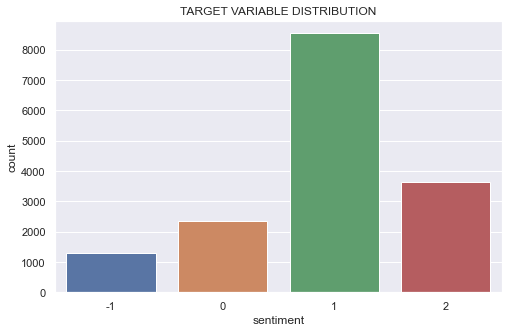

In [16]:
# Target variable distribution
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.countplot(df_train['sentiment'])
plt.title('TARGET VARIABLE DISTRIBUTION')
plt.show()

From the Sentiment Distribution, we can clear see a High level of `Class Imbalance` which is when the number of observations across different class labels are unevenly distributed. In training our classification model, it is preferable for all classes to have a relatively even split of observations. Hence we will trying out varying techniques to `Downsampling` the majority class to even off with the minority or `Upsampling` which is the reverse of Downsampling. We look to Trying the following
- Smote
- Oversampling
- Undersampling ...

<a id="five"></a>
## 5. DATA PROCESSING
<a href=#cont>Back to Table of Contents</a>

The primary funtion of datat processing is to provide Faster, higher-quality data, which is key to the success of any model building, and also enabling more valuable insights to be extracted as well. Therefore, Let's commence processing and cleaning our data.

### 5.1 Text Cleaning
Involves removing all unnecessary information from our primary dataset which will become our features required to determine our target class i.e. Sentiment. Hence, Word priority is important.

In [18]:
# First we View Data in MESSAGE Column
pd.set_option('display.max_colwidth', -1)      # set to display full text in df
df_train['message'].head(15)

0     PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable            
1     It's not like we lack evidence of anthropogenic global warming                                                                                          
2     RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…            
3     #TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD                                                     
4     RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight                              
5     Worth a read whether you do or don't believe in climate change https://t.co/ggLZVNYjun https://t.co/7AFE2mAH8j                                          
6     RT @thenation: Mike Pence doesn’t believ

#### 5.1.1 Remove Noise
From the content in our Message column, its imperative that we commence Text cleaning our data, of which we will first need to remove the noises in our text. 

In text analytics, removing noise (i.e. unneccesary information) is a key part of getting the data into a usable format

For our data set we will follow the following steps 
 * removing Removing Url / links, hashtags and mentions
 * making everything lower case
 * removing punctuation

The url is mainly the shortened version which contains no information of the context of it's address. Further insights can be drawn by search for keyword or phrases present in those address, but for the scope of this project, we will limit our cleaning to replacing it with `'url-web'` , Reason being `So we can observe how tweets with links correlates with sentiments`

In [19]:
# First we Define function that handles text cleaning
def clean_text(text):
    """
    This function uses regular expressions to 
        - remove links characters
        - remove html characters,
        - remove escape sequences,
        - remove capitalization,
        - any extra white space from each text and then converts them to lowercase.

    Input:
    text: original text
          datatype: string

    Output:
    texts: modified text
           datatype: string
    """
    # replace links with url-web
    pattern_url = 'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
    subs_url = 'url-web'
    text = re.sub(pattern_url, subs_url, text)
    # replace the html characters with " "
    text = re.sub('<.*?>', ' ', text)
    # replace escape sequence with space
    escape_seq = ["\r", "\n",'\a', '\b', '\f', "\`", '\”', '\t']
    for i in escape_seq:
        text = re.sub(i, " ", text)
    # Remove Capitalization
    text = text.lower()
    # plit and join the words
    text=' '.join(text.split())
    
    return text

In [20]:
# Applying function to clean text feature for both Train & Test dataset
df_train['message'] = df_train['message'].apply(clean_text)
df_test['message'] = df_test['message'].apply(clean_text)

In [21]:
# Check
pd.set_option('display.max_colwidth', -1)      # set to display full text in df
df_train['message'].head(8)

0    polyscimajor epa chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? url-web via @mashable            
1    it's not like we lack evidence of anthropogenic global warming                                                                          
2    rt @rawstory: researchers say we have three years to act on climate change before it’s too late url-web url-web…                        
3    #todayinmaker# wired : 2016 was a pivotal year in the war on climate change url-web                                                     
4    rt @soynoviodetodas: it's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #electionnight              
5    worth a read whether you do or don't believe in climate change url-web url-web                                                          
6    rt @thenation: mike pence doesn’t believe in global warming or that smoking causes lung cancer. url-web                                 
7    r

**Observation**

- Links replaced with url-web
- Escape sequence converts `\n\nTrump's` to `Trump's`As seen in `index line 13:` . SEE Refernce below to read up more.
- removal of capitalisation noise archieved. 
- We still have punctuations and characters such as `@` to remove. 

#### 5.1.2 Remove Punctuation 
Punctuation is the set of marks used to regulate texts and clarify their meanings, mainly by separating or linking words, phrases, and clauses.

While our models needs keywords or phrases to classify, `puntuations may become redundant`, so we can remove it.

In [22]:
# Define a function to handle punctuation removal
def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

In [23]:
# Remove Punctutaion Noise for both Train & Test dataset
df_train['message'] = df_train['message'].apply(remove_punctuation)
df_test['message'] = df_test['message'].apply(remove_punctuation)

In [24]:
# Verify Actions
pd.set_option('display.max_colwidth', -1)      # set to display full text in df
df_train['message'].head(15)

0     polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what urlweb via mashable                   
1     its not like we lack evidence of anthropogenic global warming                                                                          
2     rt rawstory researchers say we have three years to act on climate change before it’s too late urlweb urlweb…                           
3     todayinmaker wired  2016 was a pivotal year in the war on climate change urlweb                                                        
4     rt soynoviodetodas its 2016 and a racist sexist climate change denying bigot is leading in the polls electionnight                     
5     worth a read whether you do or dont believe in climate change urlweb urlweb                                                            
6     rt thenation mike pence doesn’t believe in global warming or that smoking causes lung cancer urlweb                                    
7     

NOTE; Three kind of challanges still persist; We can further tackle

* ASL fingerspelling, such as `ã¢â‚¬â¦` , lines `7`, `10` and so on

* Text wrapped in  example `‘dangerous’` and `‘misled’`, lines 12 & 14 resp.

* Thirdly, continoius dots e.g `warming………` and `urlweb…` lines `9` and `12` resp. and so on

But for now let's Proceed to Tokenization

#### 5.2 Further Data Exploration

For a more generalized overview of our dataset in other to gai further insight let's apply the Profile Report fuction.

In [109]:
'''
WARNING: 
Run ONLY After the end of Comet Experiment as file 
generated by the code interfares with Comet experiment logging
otherwise; Go ahead.
'''

# # Let's get an Overview of progress and areas of interest
# profile = ProfileReport(df_train, title="Pandas Profiling Report")
# profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Let's further dive down into understanding the influencing words, characters etc.

NOTE: However, `For this model we will be applying the CountVectorizer or TfidfVectorizer for the Text engineering`, but for insight and further review, let's go on to tokenize, remove stop-words, stem, and lemmatize our message. Any insight will prove useful in understanding the data we are dealing with.

### 5.3 Tokenization

A tokeniser divides text into a sequence of tokens, which roughly correspond to "words". We will use tokenisers to clean up the data, making it ready for analysis.

In [26]:
# Apply the tweet tokenization
tokenizer = TweetTokenizer()
df_train['tokens'] = df_train['message'].apply(tokenizer.tokenize)

In [27]:
# Check
pd.set_option('display.max_colwidth', -1)      # set to display full text in df
print(df_train['message'].iloc[10000])
print(df_train['tokens'].iloc[10000])

the washington post lies nonstop like this as trump halts fed action on climate change cities amp states push on urlweb
['the', 'washington', 'post', 'lies', 'nonstop', 'like', 'this', 'as', 'trump', 'halts', 'fed', 'action', 'on', 'climate', 'change', 'cities', 'amp', 'states', 'push', 'on', 'urlweb']


### 5.4 Remove Stop words

Stop words are words which do not contain important significance to be used in Search Queries. Usually these words are filtered out from search queries because they return a vast amount of unnecessary information.   `nltk` has a corpus of stopwords. We will be using the stopwords for `English.`

In [28]:
# Define function to remove all english stop_words
def remove_stop_words(tokens):    
    return [t for t in tokens if t not in stopwords.words('english')]

In [29]:
# Apply remove_stop_words
df_train['tokens'] = df_train['tokens'].apply(remove_stop_words)

### 5.5 Stemming & Lemming Tokens

`Stemming` is the process of transforming to the root word. It uses an algorithm that removes
common word-endings from English words, such as “ly,” “es,” “ed,” and “s.” 

For example, assuming for an analysis you may want to consider “carefully,” “cared,” “cares,” “caringly” as “care” instead of separate words. There are three widely used stemming algorithms, namely:
* Porter  (Most common, Least aggreasive)
* Lancaster (Very aggressive stemming algorithm)
* Snowball  (Moderately aggressive)

Out of these three, we will be using the `SnowballStemmer`.

`Lemmatization`

A very similar operation to stemming is called lemmatization. Lemmatizing is the process of grouping words of similar meaning together. So, your root stem, meaning the word you end up with, is not something you can just look up in a dictionary, but you can look up a lemma.

Sometimes you will wind up with a very similar word, but other times you will wind up with a completely different word.

In [31]:
#Stemming the tokenized tweets using snowball stemmer

# Initialize
stemmer = SnowballStemmer('english')
# Define Function
def df_stemmer(words, stemmer):
    return [stemmer.stem(word) for word in words]
# Apply Function
df_train['stem'] = df_train['tokens'].apply(df_stemmer, args=(stemmer, ))

Print off the results of the stemmer to see what we have done.

In [32]:
for i, t in enumerate(df_train.iloc[10000]['tokens']):    
    print ('{:20s} --> {:10s}'.format(t, df_train.iloc[10000]['stem'][i]))

washington           --> washington
post                 --> post      
lies                 --> lie       
nonstop              --> nonstop   
like                 --> like      
trump                --> trump     
halts                --> halt      
fed                  --> fed       
action               --> action    
climate              --> climat    
change               --> chang     
cities               --> citi      
amp                  --> amp       
states               --> state     
push                 --> push      
urlweb               --> urlweb    


In [33]:
# Lemming the tokenized tweets using WordNetLemmatizer

# Initialize
lemmatizer = WordNetLemmatizer()
# Define Function
def df_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]
# Apply Function
df_train['lemma'] = df_train['tokens'].apply(df_lemma, args=(lemmatizer, ))

In [34]:
# Check for lemma
for i, t in enumerate(df_train.iloc[10000]['tokens']):    
    print ('{:20s} --> {:10s}'.format(t, df_train.iloc[10000]['lemma'][i]))

washington           --> washington
post                 --> post      
lies                 --> lie       
nonstop              --> nonstop   
like                 --> like      
trump                --> trump     
halts                --> halt      
fed                  --> fed       
action               --> action    
climate              --> climate   
change               --> change    
cities               --> city      
amp                  --> amp       
states               --> state     
push                 --> push      
urlweb               --> urlweb    


### 5.6 Text feature extraction

`Still Remember!!!`
This is for Insight purposes. `CountVectorizer` handles all this.

Text feature extraction is the process of transforming what is essentially a list of words into a feature set that is usable by a classifier. The NLTK classifiers expect `dict` style feature sets, so we must therefore transform our text into a `dict`.


In [35]:
# Define function the create bag of words
def bag_of_words_count(words, word_dict={}):
    """ this function takes in a list of words and returns a dictionary 
        with each word as a key, and the value represents the number of 
        times that word appeared"""
    for word in words:
        if word in word_dict.keys():
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    return word_dict

In [36]:
# Next create a set of dictionaries, one for each of the sentiment types.
type_labels = list(df_train.sentiment.unique())
sentiments = {}
for pp in type_labels:
    df = df_train.groupby('sentiment')
    sentiments[pp] = {}
    for row in df.get_group(pp)['tokens']:
        sentiments[pp] = bag_of_words_count(row, sentiments[pp])    

In [37]:
# Next, we create a list of all of the unique words.
all_words = set()
for pp in type_labels:
    for word in sentiments[pp]:
        all_words.add(word)

`UNDERSTAND:  This was done so that we can create a combined bag of words dictionary for all the words in the text.`

These words then serve as features by which the model seeing a combination of some will classify the sentiment of each Text observation. Before being feed to the model, they are being dummy encoded for the computer to understand. Also, words or features with lesser influence can be dropped too as part of feature selection. you can read up on this as regards classifiaction.

In [38]:
# create a combined bag of words dictionary
sentiments['all'] = {}
for pp in type_labels:    
    for word in all_words:
        if word in sentiments[pp].keys():
            if word in sentiments['all']:
                sentiments['all'][word] += sentiments[pp][word]
            else:
                sentiments['all'][word] = sentiments[pp][word]

Now we can easily calculate how many words there are in total.

In [39]:
# Get total number of useful words available as features
total_words = sum([v for v in sentiments['all'].values()])
total_words

222785

Suggesting a wiser opinion of Oversampling our dataset rather than undersampling when dealing with the Class imbalance as our model will definately work better with more train observation / dataset.

Text(0.5, 0, 'word frequency')

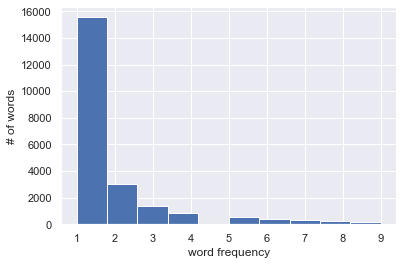

In [40]:
# Let's take a look at the distribution of words which occur less than 10 times in the whole dataset.
_ = plt.hist([v for v in sentiments['all'].values() if v < 10],bins=10)
plt.ylabel("# of words")
plt.xlabel("word frequency")

There Appear a lot of words that only appear once! We'll print out that value here.

In [41]:
# words that only appear once!
len([v for v in sentiments['all'].values() if v == 1])

15551

In [42]:
# Visualize a few of these rare words.
rare_words = [k for k, v in sentiments['all'].items() if v==1] 
print(rare_words[:100])

['shannonwhall', 'leftfootfwd', 'kicked', '80sand', 'missmayn', 'dip', 'nih', 'ukenyatta', 'francesca', 'changelets', 'catching', 'mainers', 'grassroots', 'discovermag', 'jupiter', 'mags', 'communication', 'ungtb', 'indyvoices', '100pmin', 'defunddapl', 'srujanadeva', 'broadcasting', 'blacktencommand', 'natale', 'scottforflorida', 'uhshes', 'blatantly', 'iknewweweredoomed', 'pasignyc', 'wacky', 'loolovestea', 'bumblingboris', 'rebeccawinthrop', 'bellaquiraa', 'sylviaearle', 'landfills', 'parasites', 'jolene', 'worldlandtrust', 'stortinget', 'dlomax', '900', 'wwfnews', 'francoislamarre', 'heye', '2030b', 'ices', 'givergy', 'incapable', 'italys', 'gridwachs', 'tellnyt', '15806122', 'karljkiser', 'jraedle', 'disagreed', 'ngwatweets', 'eddyjokovich', 'emigrate', 'annan', 'outsideness', 'pthompson', 'antoniobanderas', 'baniamor', 'denkyuumedia', 'trumpwillwin', 'cycleoakville', 'vancityjax', 'nlatun', 'eighth', 'needing', 'coalaction', 'mhairihunter', 'reengineer', 'ponies', 'zodiac', 'âºã'

As you can see, `SOME` of these words don't make sense, some do, but before we make any ddecision wether to keep or remove any of these, `let's see how much data we'll be left with.`

In [43]:
# how many words appear more than 10 times?
# how many words of the total does that account for?
print({len([v for v in sentiments['all'].values() if v >= 10])})
occurs_more_than_10_times = sum([v for v in sentiments['all'].values() if v >= 10])
print(f'Occurs more than 10 times:  {occurs_more_than_10_times} out of the total words (222785)')
print(f'In Percentage = {round((occurs_more_than_10_times/total_words)*100, 1)} %' )

{2414}
Occurs more than 10 times:  181971 out of the total words (222785)
In Percentage = 81.7 %


Using words that appear more than 10 times seems much more useful!  And this accounts for `81.7%` of all the words!

Finally, We can move  to removing all words that occur less than 10 times.

In [44]:
# Re-bag all words upto 10 times occurance. let the models focus more on this words
max_count = 10
remaining_word_index = [k for k, v in sentiments['all'].items() if v > max_count]

In [45]:
print(remaining_word_index)

['sea', 'otherwise', 'joined', '63', 'minutes', 'inconvenient', 'cars', '\x8f', '¬', 'primary', 'election', 'nation', 'stuff', 'house', 'epas', 'brexit', 'urged', 'companies', 'youd', 'earths', 'even', 'floods', 'beef', 'secretary', 'exit', 'resilience', 'foxnews', 'economy', 'tracker', 'dollars', 'president', 'friend', 'deserve', 'abt', 'executive', 'five', 'scared', 'response', '\x9d', 'late', 'fossiã', 'politicians', 'puanconference', 'internet', 'arent', 'involved', 'chance', 'office', 'bet', 'answers', 'please', 'nrdc', 'huffpostgreen', 'journalists', 'especially', 'black', 'terms', 'actonclimate', 'lord', 'higher', 'defense', 'commitment', 'assaadrazzouk', 'fight', 'email', 'including', 'arctic', '13', 'farming', 'extinction', 'thank', 'role', 'kerry', 'event', 'pact', 'say', 'sky', 'stories', 'ended', 'language', 'helped', 'nuclear', 'debate', '–', 'reality', 'wtf', 'ignoring', '’', 'resist', 'ivanka', 'leecamp', 'remain', 'wef', 'concept', 'peoples', '4climate', 'natural', 'inv

Like earlier said; At this point, we can do more feature engineering and hypothesis testing then we dummy encode the variables before making it ready for the model training. This was done in our version 3.0 of our Notebook but the CountVectorizer proves much better when modelling.

NOW, let's visualize the Tokens with the most sentiment using `WordCloud`. word Cloud for the various sentiments: Anti_Belief(-1), Neutral_Belief(0), Belief_Man_Made_Cause(1) and Factual_News(2). 

#### 5.7 WordCloud
It is a visual representation of text data, which is often used to depict keyword metadata on websites, or to visualize free form text.

WordCloud for the various sentiments: `Anti_Belief(-1)`, `Neutral_Belief(0)`, `Belief_Man_Made_Cause(1)` and `Factual_News(2)`. 

Text(0.5, 1.0, 'Strong Sentiment (Tweets links to Factual News about climate change)')

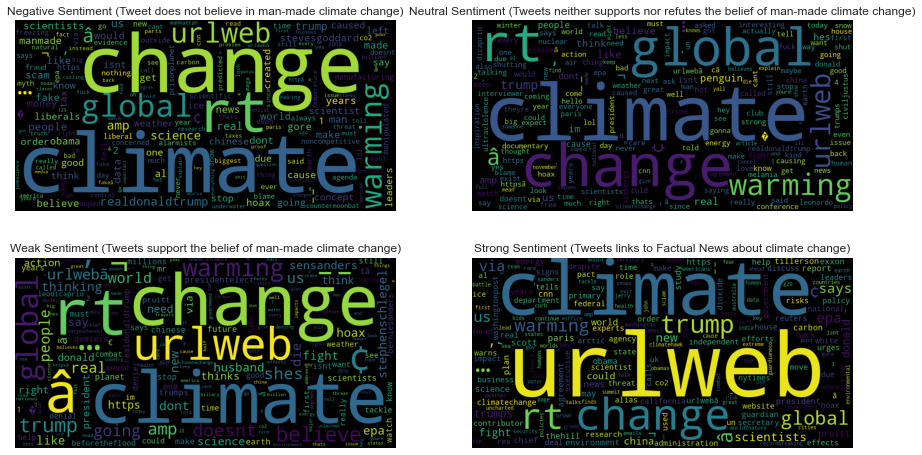

In [46]:
from PIL import Image
from wordcloud import WordCloud 

# RUN WORDCLOUD
Anti_Belief = WordCloud(width = 1000, height = 500).generate_from_frequencies(sentiments[-1])
Neutral_Belief = WordCloud(width = 1000, height = 500).generate_from_frequencies(sentiments[0])
Belief_Man_Made_Cause = WordCloud(width = 1000, height = 500).generate_from_frequencies(sentiments[1])
Factual_News = WordCloud(width = 1000, height = 500).generate_from_frequencies(sentiments[2])

#Create a canvas
fig = plt.figure(figsize=(15,8))
# setting values to rows and column variables
rows = 2
columns = 2

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
# showing image
plt.imshow(Anti_Belief)
plt.axis('off')
plt.title("Negative Sentiment (Tweet does not believe in man-made climate change)")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
# showing image
plt.imshow(Neutral_Belief)
plt.axis('off')
plt.title("Neutral Sentiment (Tweets neither supports nor refutes the belief of man-made climate change)")

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
# showing image
plt.imshow(Belief_Man_Made_Cause)
plt.axis('off')
plt.title("Weak Sentiment (Tweets support the belief of man-made climate change)")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
# showing image
plt.imshow(Factual_News)
plt.axis('off')
plt.title("Strong Sentiment (Tweets links to Factual News about climate change)")

From the WordCloud; 
- You can see that, the more URLs in the tweets, the higher the sentiments about climate change.
- we can see "Chang" and "climat" has the highest frequency in all the sentiments hence they will be purged in the data engineering section because they contribute nothing to the model. 

<a id="six"></a>
## 6. Feature Engineering
<a href=#cont>Back to Table of Contents</a>

This involves preparations to make ready our data to serve those structured selected features to models upon request.

In [47]:
# Feature Extract using CountVectorizer
vect = CountVectorizer(min_df=1, max_df=0.9, ngram_range=(1, 2))

In [48]:
# Extracting features and label 
X = vect.fit_transform(df_train['message'])
y = df_train['sentiment']

In [54]:
'''
This cell is set to initiate varying technique of OVERSAMPLING that will
be applied to our models and the very best will be adopted.
'''
# Initialize Counter
ct = Counter(y)

# Oversampling using SMOTE
print('Before Oversampling: ', ct)
sm = SMOTE(random_state = 50)
X_stm, y_stm = sm.fit_resample(X, y)
ct2 = Counter(y_stm)
print('SMOTE After: ', ct2)

# Oversampling the train dataset using SMOTE + Tomek
stm = SMOTETomek(random_state = 50)
X_stm_tm, y_stm_tm = stm.fit_resample(X, y)
ct3 = Counter(y_stm_tm)
print('SMOTETomek After: ', ct3)

# Oversampling the train dataset using SMOTE + Enn
ste = SMOTEENN(random_state = 50)
X_stm_en, y_stm_en = ste.fit_resample(X, y)
ct4 = Counter(y_stm_en)
print('SMOTEEnn After: ', ct4)

Before Oversampling:  Counter({1: 8530, 2: 3640, 0: 2353, -1: 1296})
SMOTE After:  Counter({1: 8530, 2: 8530, 0: 8530, -1: 8530})
SMOTETomek After:  Counter({-1: 8527, 0: 8513, 1: 8463, 2: 8463})
SMOTEEnn After:  Counter({2: 5663, -1: 4854, 0: 1703, 1: 1521})


In [55]:
'''
This cell is set to initiate varying technique of UNDERSAMPLING that will
be applied to our models and the very best will be adopted.
'''

# Undersampling using NearMiss-2: 
# Majority class examples with minimum average distance to three furthest minority class examples.
print('Before Undersampling: ', ct)
undersample = NearMiss(version=2, n_neighbors=3)
X_near, y_near = undersample.fit_resample(X, y)
ct5 = Counter(y_near)
print('NearMiss-2 After: ', ct5)

# Undersampling using TomekLinks
undersample = TomekLinks()
X_tom, y_tom = undersample.fit_resample(X, y)
ct6 = Counter(y_tom)
print('TomekLinks After: ', ct6)

# Undersampling using NeighbourhoodCleaningRule
undersample = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)
X_nei_clean, y_nei_clean = undersample.fit_resample(X, y)
ct7 = Counter(y_nei_clean)
print('Nei_clean_rule After: ', ct7)

Before Undersampling:  Counter({1: 8530, 2: 3640, 0: 2353, -1: 1296})
NearMiss-2 After:  Counter({-1: 1296, 0: 1296, 1: 1296, 2: 1296})
TomekLinks After:  Counter({1: 8434, 2: 3551, 0: 2327, -1: 1296})
Nei_clean_rule After:  Counter({1: 4201, 0: 1793, -1: 1296, 2: 1221})


Now we have a set of features and labels from default dataset to oversampled ones to undersampled, all ready to be applied to modeling to understand which state best fits our dataset. Classes is listed below;

* OverSampling the minority class Technique;
    - **SMOTE Method;** It first selects a minority class instance a at random and finds its k nearest minority class neighbors.
    - **SMOTE + Tomek Method;** a combination of both methods
    - **SMOTE + Enn Method** etc.

* Undersampling the majority class Technique;
    - **Nearmiss:2 Method;** selects examples from the majority class that have the smallest average distance to the three furthest examples from the minority class.
    - **CondensedNearestNeighbour;** achieved by enumerating the examples in the dataset and adding them to the “store” only if they cannot be classified correctly by the current contents of the store. 
    - **Tomeklinks;** A modifications to condensed nearest-neighbor (CNN) method which chooses samples randomly. 
    - **NeighbourhoodCleaningRule;** combines both the Condensed Nearest Neighbor (CNN) Rule to remove redundant examples and the Edited Nearest Neighbors (ENN) Rule to remove noisy or ambiguous examples

In [56]:
'''
split data to Train/Test set
Split applied for each class balancing technique
The Goal is to select best performing
'''
# Split using Default X & y
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=50)

# Split using SMOTE X & y
X_train_stm, X_val_stm, y_train_stm, y_val_stm = train_test_split(X_stm, y_stm, test_size=0.1, random_state=50)
# Split using SMOTETomek X & y
X_train_tm, X_val_tm, y_train_tm, y_val_tm = train_test_split(X_stm_tm, y_stm_tm, test_size=0.1, random_state=50)
# Split using SMOTEEnn X & y
X_train_en, X_val_en, y_train_en, y_val_en = train_test_split(X_stm_en, y_stm_en, test_size=0.1, random_state=50)

# Split using NearMiss-2 X & y
X_train_n, X_val_n, y_train_n, y_val_n = train_test_split(X_near, y_near, test_size=0.1, random_state=50)
# Split using Tomelinks X & y
X_train_t, X_val_t, y_train_t, y_val_t = train_test_split(X_tom, y_tom, test_size=0.1, random_state=50)
# Split using NeighbourhoodCleaningRule X & y
X_train_nc, X_val_nc, y_train_nc, y_val_nc = train_test_split(X_nei_clean, y_nei_clean, test_size=0.1, random_state=50)

Before we move on, let's take a look at the distribution of observations between our classes.

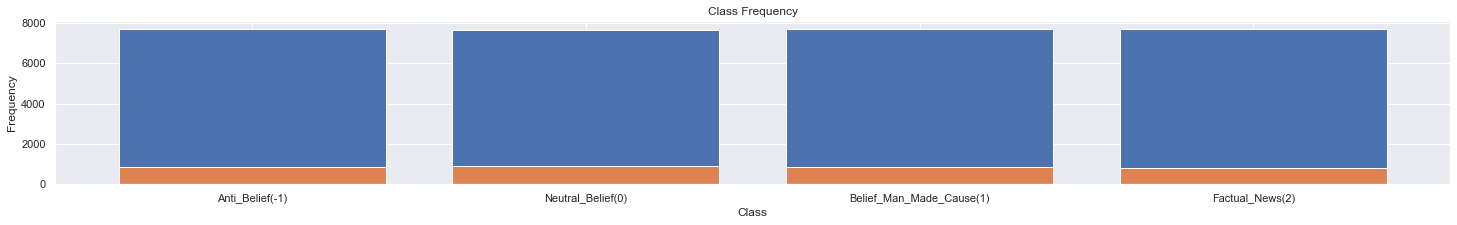

 2    7700
-1    7690
 1    7677
 0    7641
Name: sentiment, dtype: int64

In [58]:
# Sample of Class Distribution after OVERSAMPLING (SMOTE method)
unique, counts = np.unique(y_train_stm, return_counts=True)
plt.bar(unique, counts)
unique, counts = np.unique(y_val_stm, return_counts=True)
plt.bar(unique, counts)

plt.rcParams["figure.figsize"] = (25, 3)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(ticks=[-1, 0, 1, 2], 
           labels=['Anti_Belief(-1)', 'Neutral_Belief(0)', 'Belief_Man_Made_Cause(1)', 'Factual_News(2)'])

plt.show()
y_train_stm.value_counts()

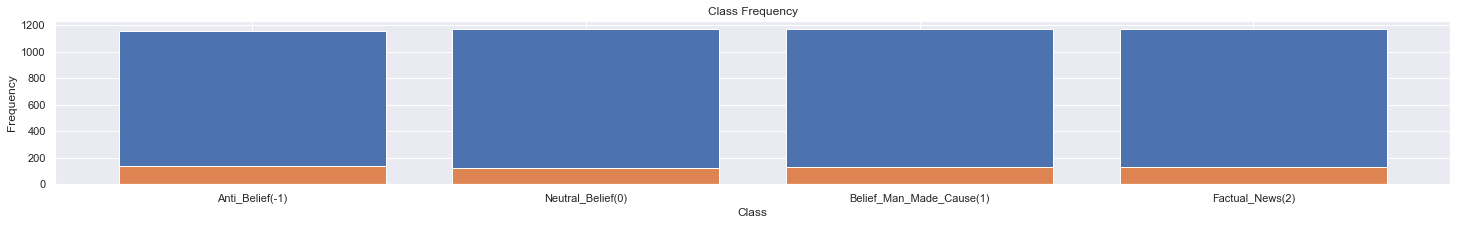

 0    1171
 1    1168
 2    1167
-1    1159
Name: sentiment, dtype: int64

In [60]:
# Sample of Class Distribution after UNDERSAMPLING (Nearmiss Method)
unique, counts = np.unique(y_train_n, return_counts=True)
plt.bar(unique, counts)
unique, counts = np.unique(y_val_n, return_counts=True)
plt.bar(unique, counts)

plt.rcParams["figure.figsize"] = (25, 3)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(ticks=[-1, 0, 1, 2], 
           labels=['Anti_Belief(-1)', 'Neutral_Belief(0)', 'Belief_Man_Made_Cause(1)', 'Factual_News(2)'])

plt.show()
y_train_n.value_counts()

The Effect of Class imbalance can be devasteting to model performance. As you can see we now have varying degrees of balanced forms of our dataset. 

let's now proceed to Model building

<a id="seven"></a>
## 7. Modeling
<a href=#cont>Back to Table of Contents</a>

There are several modelling techniques we can apply as classifiers, and of the vast options, we will be trying;

`1. Logistics Regression classifier: ` Used to model the probability of a certain class or event taking place, such as the probability of a team winning, of a patient being healthy, etc. This can be extended to model several classes of events as we have seen, such as determining whether an image contains a cat, dog, lion, etc. Each object being detected in the image would be assigned a probability between 0 and 1, with a sum of one. The word Logistics comes from the logistics function which takes the S-shape curve called `sigmoio`. It has a point of inflection, which can be used to separate the feature space into two distinct areas (one for each class). It has shallow gradients at both its top and bottom, which can be mapped to zeroes or ones respectively with little ambiguity

<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/sketch-logistic-regression.png" alt="sketch-logistic-regression" style="width: 600px;"/>

`2. LinearSVC classifier: ` applies a linear kernel function to perform classification and it performs well with a large number of samples. If we compare it with the SVC model, the Linear SVC has additional parameters such as penalty normalization which applies 'L1' or 'L2' and loss function. The kernel method can not be changed in linear SVC, because it is based on the kernel linear method. 

`3. Naive bayes: `Naive bayes is most commonly used for testing NLP classification because of its basis in probability. it's algorithm attempts to answer the question 'Given a particular piece of data how likely is the outcome?'. Each word acts as a feature from our count vectorizer helping classify our message using probability. There are three types of Naive Bayes model under the scikit-learn library:

    Gaussian: It is used in classification and it assumes that features follow a normal distribution.

    Multinomial: It is used for discrete counts. For example, let’s say,  we have a text classification problem. Here we can consider Bernoulli trials which is one step further and instead of “word occurring in the document”, we have “count how often word occurs in the document”, you can think of it as “number of times outcome number x_i is observed over the n trials”.

    Bernoulli: The binomial model is useful if your feature vectors are binary (i.e. zeros and ones). One application would be text classification with ‘bag of words’ model where the 1s & 0s are “word occurs in the document” and “word does not occur in the document” respectively.

These are but a few classifiers listed, so let's dive into the modellig experimet.

#### 7.1 Set Classifier

In [61]:
"""
You can go ahead to adding to try other models
this list of classifiers

Some where hashed out due to Runtime rate. You can Unhash and try it out. Goodluck!!!
"""

classifiers = [LinearSVC(),
               
               #SVC(),
               
               MultinomialNB(),
               
               ComplementNB(),
               
               LogisticRegression(),
               
               #RandomForestClassifier(max_depth = 25, random_state = 42),
               
               #KNeighborsClassifier(n_neighbors=5),
               
               #SGDClassifier(loss='hinge',
#                              penalty='l2',
#                              alpha=1e-3,
#                              random_state=42,
#                              max_iter=5,
#                              tol=None)
               ]

#### 7.2 Build Model function

In [64]:
def models_building(classifiers, X_train, y_train, X_val, y_val):
    """
    This function takes in a list of classifiers and both the train and validation sets
    and return a summary of F1-score and processing time as a dataframe

    Input:
    classifiers: a list of classifiers to train
                 datatype: list
    X_train: independent variable for training
                 datatype: series
    y_train: dependent variable for training
                 datatype: series
    X_val: independent variable for validation
                 datatype: series
    y_val: dependent variable for validation
                 datatype: series

    Output:
    model_summary: F1 Score for all the classifiers
                 datatype: dataframe
    """

    models_summary = {}

    # Pipeline to balance the classses and then to build the model
    for clf in classifiers:
        clf_para = Pipeline([('clf', clf)])

        # Logging the Execution Time for each model
        start_time = time.time()
        clf_para.fit(X_train, y_train)
        predictions = clf_para.predict(X_val)
        run_time = time.time() - start_time

        # Score output for each model
        models_summary[clf.__class__.__name__] = {
            'F1-Macro': metrics.f1_score(y_val,
                                         predictions,
                                         average='macro'),
            'F1-Accuracy': metrics.f1_score(y_val, predictions,
                                            average='micro'),
            'F1-Weighted': metrics.f1_score(y_val,
                                            predictions,
                                            average='weighted'),
            'Execution Time': run_time}

    return pd.DataFrame.from_dict(models_summary, orient='index')

#### 7.2 Execute Classifier

In [66]:
# For the default data state of class imbalance
classifiers_df_default = models_building(classifiers, X_train, y_train, X_val, y_val)

In [67]:
# For the Oversampled sets
classifiers_df_smote = models_building(classifiers, X_train_stm, y_train_stm, X_val_stm, y_val_stm)
classifiers_df_smotetomek = models_building(classifiers, X_train_tm, y_train_tm, X_val_tm, y_val_tm)
classifiers_df_smoteenn = models_building(classifiers, X_train_en, y_train_en, X_val_en, y_val_en)

In [68]:
# For the Undersampled sets
classifiers_df_nearmiss2 = models_building(classifiers, X_train_n, y_train_n, X_val_n, y_val_n)
classifiers_df_tomelinks = models_building(classifiers, X_train_t, y_train_t, X_val_t, y_val_t)
classifiers_df_ncr = models_building(classifiers, X_train_nc, y_train_nc, X_val_nc, y_val_nc)

NOW; We have Oversampled our dataset using the SMOTE method. Note that this was applied only to the training dataset and the Test set (in red) remains untouched to act for as unseen/ Real world data.

<a id="eight"></a>
## 8. MODEL PERFORMANCE
<a href=#cont>Back to Table of Contents</a>

Here will be reviewing the individual performance of our machine learning model and why to use one in place of the other

### 8.1 Model Testing Scores


In [69]:
# Test scores in dataframe
df = classifiers_df_default.sort_values('F1-Macro', ascending=False)

df_smote = classifiers_df_smote.sort_values('F1-Macro', ascending=False)
df_smotetomek = classifiers_df_smotetomek.sort_values('F1-Macro', ascending=False)
df_smoteenn = classifiers_df_smoteenn.sort_values('F1-Macro', ascending=False)

df_nearmiss = classifiers_df_nearmiss2.sort_values('F1-Macro', ascending=False)
df_tomelinks = classifiers_df_tomelinks.sort_values('F1-Macro', ascending=False)
df_ncr = classifiers_df_ncr.sort_values('F1-Macro', ascending=False)

In [82]:
print(f'DEFAULT: {df}'), print('\n')
print(f'SMOTE: {df_smote}'), print('\n')
print(f'SMOTE + Tomek: {df_smotetomek}'), print('\n')
print(f'SMOTE + ENN: {df_smoteenn}'), print('\n')
print(f'NEARMISS type 2: {df_nearmiss}'), print('\n')
print(f'TOMELINKS: {df_tomelinks}'), print('\n')
print(f'NCR: {df_ncr}')

DEFAULT:                     F1-Macro  F1-Accuracy  F1-Weighted  Execution Time
LogisticRegression  0.686169  0.770544     0.761286     40.264674     
LinearSVC           0.685617  0.765487     0.757711     19.733823     
ComplementNB        0.640372  0.704172     0.706103     0.123922      
MultinomialNB       0.618063  0.730088     0.711172     0.144912      


SMOTE:                     F1-Macro  F1-Accuracy  F1-Weighted  Execution Time
LogisticRegression  0.756010  0.755862     0.755383     43.999846     
LinearSVC           0.749032  0.748535     0.748407     56.439173     
MultinomialNB       0.608356  0.633353     0.604925     0.168895      
ComplementNB        0.605767  0.628370     0.602378     0.161898      


SMOTE + Tomek:                     F1-Macro  F1-Accuracy  F1-Weighted  Execution Time
LogisticRegression  0.759415  0.761554     0.759971     39.430663     
LinearSVC           0.750189  0.751251     0.750806     47.414741     
ComplementNB        0.599618  0.629084    

#### 8.2 Best Model Resolution

From the Result we can conclusively say that class balancing do positively improve the performance of our model as we can see in order of performance;
* 1. Smote + Tomek Oversampling @ F1-weighted of 96%
* 2. NeighbourhoodCleaningRule (NCR) Undersampling @ F1-weighted of 83%

And we can also see that the best models keeps flutuating between `Logistics Regression classifier` and `Linear Support Vector Classifer` but in summary `Logistics Regression classifier with SmoteTomek class balancing technique` is the Best Model

However it is worthy of stating that we first started experiment earlier with the `Multinomial Naive Bayes Model` as our Base Model used in earlier Notebook as seen to have an Accuracy of 71%.

Hence, let's proceed will proceed to hypertunning our best model and feeding it with the best performing Balanced dataset i.e. SMOTE + ENN.

#### 8.3 Hypertune Best Model

For every model, our goal is to minimize the error or say to have classification or predictions as close as possible to actual values. This is one of the cores or say the major objective of hyperparameter tuning. 

In [83]:
# Creating a pipeline for the gridsearch

# set parameter grid
param_grid = { 'C': [0.1], 
              'penalty': ['l1', 'l2']}  

hyper_best_model = Pipeline([('logReg', GridSearchCV(LogisticRegression(),
                                           param_grid=param_grid,
                                           cv=5,
                                           n_jobs=-1,
                                           scoring='f1_weighted'))
                      ])

# Fiting data to Best Model (SmoteENN)
hyper_best_model.fit(X_train_en, y_train_en) 

# predicting the fit on validation set
y_pred = hyper_best_model.predict(X_val_en)  

class_report = classification_report(y_val_en, y_pred)
print(class_report) 

              precision    recall  f1-score   support

          -1       0.91      0.96      0.94       489
           0       0.95      0.76      0.84       182
           1       0.98      0.94      0.96       133
           2       0.95      0.98      0.97       571

    accuracy                           0.94      1375
   macro avg       0.95      0.91      0.93      1375
weighted avg       0.94      0.94      0.94      1375



In [84]:
print(f'Accuracy Score: {round(metrics.accuracy_score(y_val_en, y_pred), 2) * 100}''%')

Accuracy Score: 94.0%


1. first Accuracy Score: 71.0%

#### 8.4 Best Model Confusion matrix
Measuring the effectiveness and performance is what exactly the confusion matrix is design to do. So we will be putting this up bot in Numbers and visuals.

In [85]:
labels = ['1: News', '2: Pro', '0: Neutral', '-1: Anti']
pd.DataFrame(data=confusion_matrix(y_val_en, y_pred), index=labels, columns=labels)

,1: News,2: Pro,0: Neutral,-1: Anti
1: News,471,6,1,11
2: Pro,33,138,0,11
0: Neutral,3,0,125,5
-1: Anti,9,1,1,560


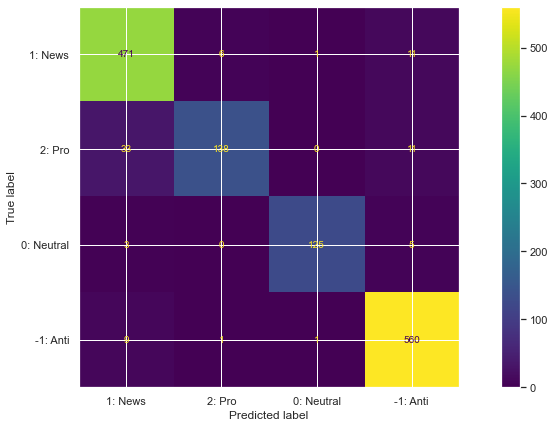

In [86]:
# Confusion matrix
cm = confusion_matrix(y_val_en, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(15,7))
disp.plot(ax=ax)
plt.show()

As you can see above, The colourful diagonal with contrast to the gradient on the right hand side of the graph, represent the Correct Predictions per sentiment and the dark area to the left and right represent near zero errors. The diagonal also reveals our output prediction is not balanced in terms of number of sentiments predicted. Overall, it tells we have a good model at hand.

<a id="nine"></a>
## 9. SAVING & EXPORTING MODEL
<a href=#cont>Back to Table of Contents</a>

Of course we don't want our models just sitting some jupyter notebook somewhere, at this point, its time to save results to desired format, preferrably CSV and model as a pickle file. This will be used for deployment purposes to solving real life scenerios.

#### 9.1 Export Test Prediction as CSV

In [101]:
'''
Unhash to Run 
(CTRL + /)
'''

# X_test = vect.transform(df_test['message']) 
# test_pred = hyper_best_model.predict(X_test)
# save_df = pd.DataFrame(test_pred, columns=['sentiment'])
# output=pd.DataFrame({'tweetid': df_test['tweetid']})
# submission=output.join(save_df)

'\nUnhash to Run (CTRL + /)\n'

In [102]:
# submission.to_csv('submission_hyper.csv', index=False)

In [103]:
import pickle

model_save_path = "TM12_3.0_LogReg_Hyper.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(hyper_best_model, file)

#### 9.2 Log to Comet

In [105]:
# Create dictionaries for the data we want to log
# This had to be defined since that applied to our model is the best from the grid search.
params ={"random_state": 50,
         "model_type ": "LogisticsRegression",
         "Bag of words": "Count_Vectorizer",
         "C": 0.1,
         "min_df": 1,
         "max_df": 0.9,
         "n_grams": "(1, 2)"
        }

nb_metrics ={"Accuracy": metrics.accuracy_score(y_val_en, y_pred),
             "recall": metrics.recall_score(y_val_en, y_pred, average='micro'),
             "f1": metrics.f1_score(y_val_en, y_pred, average='micro'),
            }

confusionmatrix = confusion_matrix(y_val_en, y_pred)

In [106]:
#log parameters and results
experiment.log_parameters(params)
experiment.log_metrics(nb_metrics)
experiment.log_notebook('5.0 Advance_Classification_Notebook.ipynb', overwrite=False)
experiment.log_confusion_matrix(labels=["News", "pro", "Neutral","Anti"], matrix=confusionmatrix)

{'web': 'https://www.comet.ml/api/asset/download?assetId=4d3826f5ac1d40b797a034967c1ab127&experimentKey=53bdf10ae2b14a6c99b6a1474dca13bf',
 'api': 'https://www.comet.ml/api/rest/v2/experiment/asset/get-asset?assetId=4d3826f5ac1d40b797a034967c1ab127&experimentKey=53bdf10ae2b14a6c99b6a1474dca13bf',
 'assetId': '4d3826f5ac1d40b797a034967c1ab127'}

If you're using comet within a jupyter notebook, it's important to end your experiment when you've finished as illustrated below.

NOTE: If notebook was ran from top to bottom, including the Pandas_Profile code, This will prevent a successful logging on Comet prompting an index error. Restart Kernel and rerun notebook manually exclude the Pandas_profile code for a successful Run. (after removal of punctuation)

In [107]:
# STRICTLY FOR LOCAL JUPYTER NOTEBOOKS
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/jeniffermukami/team-12-advanced-classification-sentiment-analysis/53bdf10ae2b14a6c99b6a1474dca13bf
COMET INFO:   Metrics:
COMET INFO:     Accuracy : 0.9410909090909091
COMET INFO:     f1       : 0.9410909090909091
COMET INFO:     recall   : 0.9410909090909091
COMET INFO:   Parameters:
COMET INFO:     Bag of words                         : Count_Vectorizer
COMET INFO:     C                                    : 0.1
COMET INFO:     algorithm                            : auto
COMET INFO:     alpha                                : 1.0
COMET INFO:     class_prior                          : 1
COMET INFO:     class_weight                         : 1
COMET INFO:     clf                                  : LogisticRegression()
COMET INFO:     clf_C          

COMET INFO:     logReg__n_jobs                       : -1
COMET INFO:     logReg__param_grid                   : {"C": [0.1], "penalty": ["l1", "l2"]}
COMET INFO:     logReg__pre_dispatch                 : 2*n_jobs
COMET INFO:     logReg__refit                        : True
COMET INFO:     logReg__return_train_score           : False
COMET INFO:     logReg__scoring                      : f1_weighted
COMET INFO:     logReg__verbose                      : 0
COMET INFO:     logReg_cv                            : 5
COMET INFO:     logReg_error_score                   : nan
COMET INFO:     logReg_estimator                     : LogisticRegression()
COMET INFO:     logReg_estimator__C                  : 1.0
COMET INFO:     logReg_estimator__class_weight       : 1
COMET INFO:     logReg_estimator__dual               : False
COMET INFO:     logReg_estimator__fit_intercept      : True
COMET INFO:     logReg_estimator__intercept_scaling  : 1
COMET INFO:     logReg_estimator__l1_ratio           :

Kindly [Go to Streamlite Webpage](http://52.31.114.79:5000/) to test-run an actual perfromance of our model on the web.

<a id="ten"></a>
## 10. Conclusion
<a href=#cont>Back to Table of Contents</a>

   In summary `Logistics Regression classifier with SmoteTomek class balancing technique` is the Best performing Model and class balancing technique, performing best both in the training and validation phase with an accuracy score of over 94%, representing it's ability when dealing with unforseen data . This means that our dataset to a high degree, is linearly seperable.

<a id="eleven"></a>
## 11. Recommendation
<a href=#cont>Back to Table of Contents</a>

Companies can now go ahead to determining the sentimentlity rate of their target market and proceed planning in the light of this knowledge. So go ahead, carry out some sample testing on our [web interface](http://52.31.114.79:5000/). 

The marketing team(s) can now move into integrating this model to their focused market domain, gain insight on market behavior, maximise productivity, driving profitability by knowledge of the demand & Supply on her goods & Services.

There is no limiting to the application of this model. Also, this model concept can further be modified to dealing with impending Roits or societal disturbance too as well.

<a id="ref"></a>
## Reference Links
<a href=#cont>Back to Table of Contents</a>

* [EXPLORE Data Science Academy Resources](https://explore-datascience.net/)
* [GitHub Collab Ref.](https://github.com/)
* [Commet Collab Ref](https://www.comet.ml/) 
* [Kaggle Collab Ref](https://www.kaggle.com/c/edsa-climate-change-belief-analysis-2022/overview)
* [Escape Seqences](https://linuxconfig.org/list-of-python-escape-sequence-characters-with-examples)
* [Oversampling Methods](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)
* [Undersampling Methods](https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/)